In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pointpats import distance_statistics

In [5]:
# Load your data
in_file = os.path.join('..', 'in', 'datacentermap.csv')
dc_df = pd.read_csv(in_file)

In [6]:
def remove_nan_rows(df, lat_column='latitude', lon_column='longitude'):
    """
    Remove rows with NaN values in specified latitude and longitude columns from a dataframe.
    
    Parameters:
    - df: pandas DataFrame
        The dataframe containing latitude and longitude columns.
    - lat_column: str, optional (default='latitude')
        Name of the latitude column.
    - lon_column: str, optional (default='longitude')
        Name of the longitude column.
    
    Returns:
    - df_cleaned: pandas DataFrame
        DataFrame with rows containing NaN values in latitude or longitude columns removed.
    """
    # Check for NaN values in specified columns
    nan_mask = df[[lat_column, lon_column]].isnull().any(axis=1)
    
    # Remove rows with NaN values
    df_cleaned = df[~nan_mask]
    
    return df_cleaned

In [7]:
dc_df = remove_nan_rows(dc_df)

len(dc_df)

6075

In [8]:
# Filter data for data centers in the USA
us_dc = dc_df[dc_df['country'] == 'USA']

us_dc_mainland = us_dc[us_dc['state'] != 'Hawaii']

In [9]:
# Extract coordinates (assuming latitude and longitude columns)
coordinates = us_dc_mainland[['latitude', 'longitude']].values

In [10]:
def compute_ripley_g(coordinates):
    g_test = distance_statistics.g_test(
        coordinates, support=40, keep_simulations=True
    )
    return g_test

In [11]:
g_test = compute_ripley_g(coordinates)

In [12]:
def compute_ripley_f(coordinates):
    # Compute Ripley's F function
    f_test = distance_statistics.f_test(
        coordinates, support=40, keep_simulations=True
    )
    return f_test

In [13]:
f_test = compute_ripley_f(coordinates)

In [14]:
def compute_ripley_f(coordinates):
    # Compute Ripley's F function
    f_test = distance_statistics.f_test(
        coordinates, support=40, keep_simulations=True
    )
    return f_test

In [15]:
def plot_ripley(coordinates, test, type, xlim=False):
    # Plotting
    f, ax = plt.subplots(1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3)))

    # Plot simulations with fine lines
    ax[0].plot(test.support, test.simulations.T, color="k", alpha=0.01)

    # Plot median of simulations
    ax[0].plot(test.support, np.median(test.simulations, axis=0), color="cyan", label="median simulation")

    # Plot observed pattern's F function
    ax[0].plot(test.support, test.statistic, label="observed", color="red")

    # Labeling and formatting
    ax[0].set_xlabel("Distance")
    ax[0].set_ylabel("% of nearest point in pattern\ndistances shorter")
    ax[0].legend()
    if xlim:
        ax[0].set_xlim(0, xlim)
    ax[0].set_title(f"Ripley's ${type}(d)$ function")

    # Plot the data points themselves
    ax[1].scatter(coordinates[:, 1], coordinates[:, 0])  # assuming latitude is y, longitude is x

    # Formatting the plot of the pattern
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[1].set_title("Pattern")

    # Adjust layout and display
    f.tight_layout()
    plt.show()

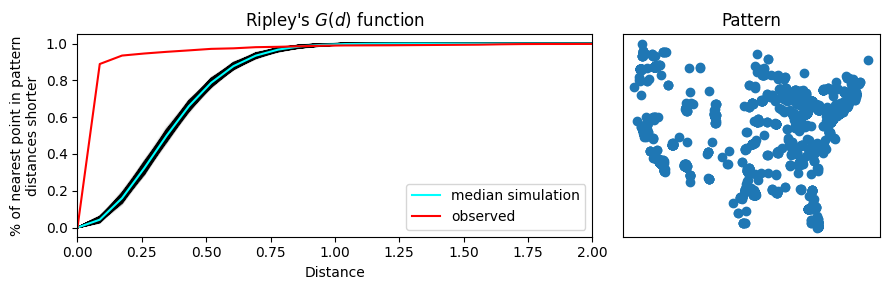

In [16]:
plot_ripley(coordinates, g_test, 'G', xlim=2)

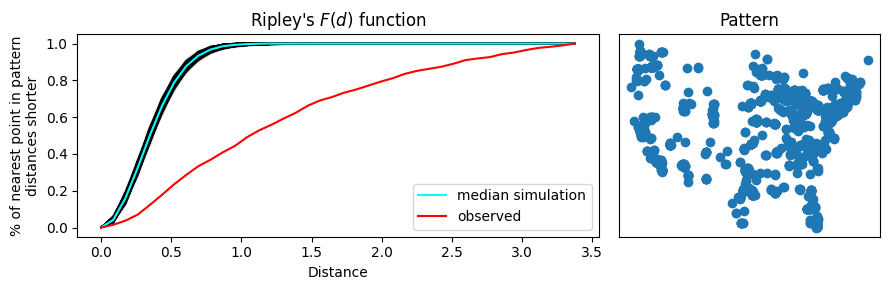

In [17]:
plot_ripley(coordinates, f_test, 'F')